# Deep RL using DQN agent

#### Install the Dependencies

In [ ]:
!pip install keras-rl2

#package is referred as rl


In [ ]:
!pip install tensorflow==2.3.0
!pip install keras



In [ ]:
!pip install gymnasium


# 1. Test Random Environment with OpenAI Gym

In [1]:
import gymnasium as gym
import random


C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
env = gym.make('CartPole-v0')
env

<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<CartPoleEnv<CartPole-v0>>>>>>

In [4]:

states = env.observation_space.shape[0]

states

4

In [5]:
actions = env.action_space.n

actions


2

In [6]:
#building the environemnt here

episodes = 10

for episode in range(1, episodes+1):
    state = env.reset() #random
    done = False
    score = 0 #reward
    
    while not done:
        env.render()
        
        action = random.choice([0,1])  #later have agent decision here
         
        n_state, reward, done, info = env.step(action) ###
        
        score+=reward
        
    print('Episode:{} Score:{}'.format(episode, score))  #episode and reward/score

C:\Users\admin\anaconda3\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
C:\Users\admin\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:1 Score:11.0
Episode:2 Score:30.0
Episode:3 Score:15.0
Episode:4 Score:20.0
Episode:5 Score:20.0
Episode:6 Score:34.0
Episode:7 Score:14.0
Episode:8 Score:33.0
Episode:9 Score:21.0
Episode:10 Score:15.0


# 2. Create a Deep Learning Model with Keras

In [7]:
import numpy as np

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import Adam


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
C:\Users\admin\anaconda3\lib\site-packages\botocore\httpsession.py:28: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


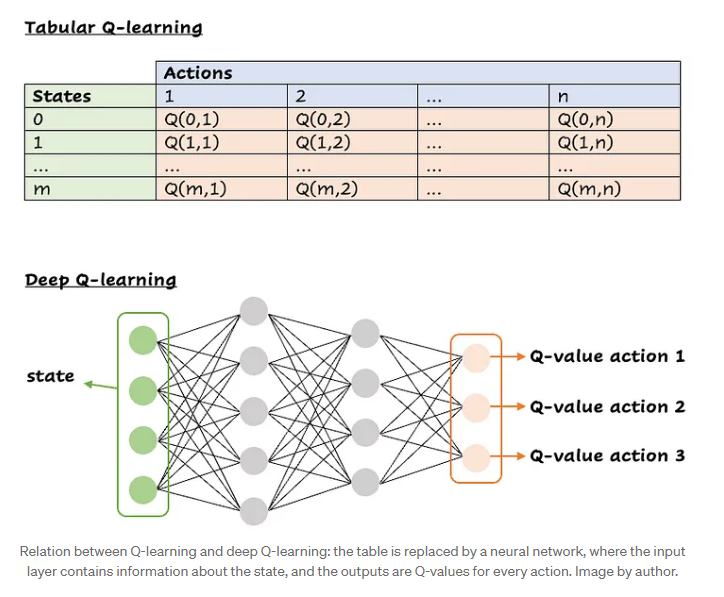

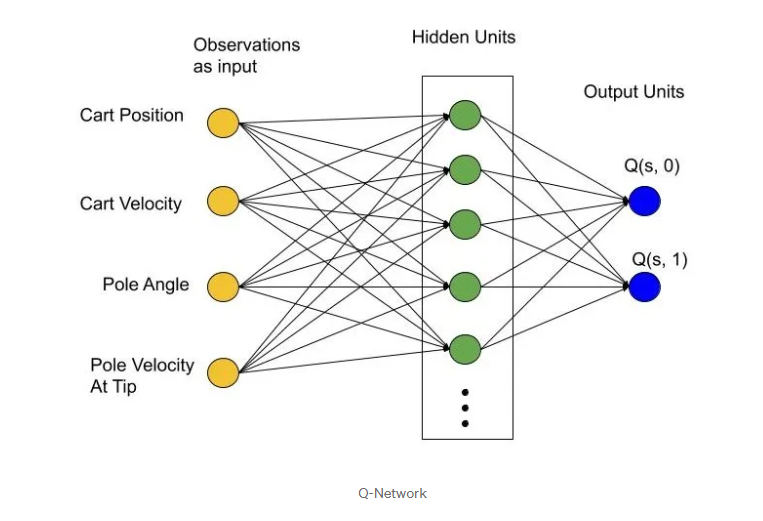

In [8]:
def build_model(states, actions):
    
    model = Sequential()
    
    model.add(Flatten(input_shape=(1,states)))
    
    model.add(Dense(24, activation='relu'))
    
    model.add(Dense(24, activation='relu'))
    
    model.add(Dense(actions, activation='linear'))
    
    return model

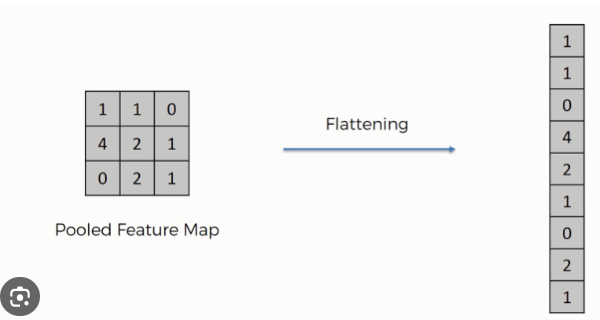

In [9]:
states

actions

2

In [20]:
del model

In [21]:
model = build_model(states, actions)

model

In [22]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 24)                120       
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


In [32]:
#keras rl

from rl.agents import DQNAgent # main agent here

from rl.policy import BoltzmannQPolicy

from rl.memory import SequentialMemory


# 3. Build Agent with Keras-RL

In [16]:
# https://keras-rl.readthedocs.io/en/latest/


In [ ]:
# DQN Agent using the MLP model inside for training on the given environment


RuntimeError: jaxlib version 0.4.14 is newer than and incompatible with jax version 0.4.10. Please update your jax and/or jaxlib packages.


!pip install --upgrade "jax[cuda]"



In [24]:
def build_agent(model, actions):
    
    policy = BoltzmannQPolicy()
    
    memory = SequentialMemory(limit=50000, window_length=1)
    
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

### The Boltzmann policy normalizes the final Q values using a softmax function and,
### uses the resulting values as probabilities, selecting an action much like a stochastic policy.

# Sequential memory is used by the DQN agent to store various states, actions, and rewards. 

# It has the following data structures: 
observations (dict): Observations returned by the environment. actions (int): Actions taken to obtain this observation.


In [36]:
dqn = build_agent(model, actions)
dqn

In [38]:

dqn.compile(Adam(lr=1e-3), metrics=['mae'])



C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


AttributeError: 'Sequential' object has no attribute '_compile_time_distribution_strategy'


In [39]:

dqn.fit(env, nb_steps=50000, visualize=True, verbose=1)





Training for 50000 steps ...
Interval 1 (0 steps performed)


C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    7/10000 [..............................] - ETA: 3:21 - reward: 1.0000

C:\Users\admin\anaconda3\lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


   10/10000 [..............................] - ETA: 3:23 - reward: 1.0000

C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   18/10000 [..............................] - ETA: 18:25 - reward: 1.0000

C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) 

   28/10000 [..............................] - ETA: 13:03 - reward: 1.0000

C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 19 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 21 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 22 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 23 + 1) 

   35/10000 [..............................] - ETA: 11:10 - reward: 1.0000

C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 27 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 28 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 29 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\admin\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 31 + 1) 

10000/10000 [==============================] - 247s 25ms/step - reward: 1.0000
55 episodes - episode_reward: 178.364 [54.000, 200.000] - loss: 12.824 - mae: 41.549 - mean_q: 83.666

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 231s 23ms/step - reward: 1.0000
52 episodes - episode_reward: 195.019 [73.000, 200.000] - loss: 11.955 - mae: 41.510 - mean_q: 83.399

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 225s 22ms/step - reward: 1.0000
50 episodes - episode_reward: 198.760 [138.000, 200.000] - loss: 15.268 - mae: 42.573 - mean_q: 85.353

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 242s 24ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 14.599 - mae: 41.693 - mean_q: 83.507

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 258s 26ms/step - reward: 1.0000
done, took 1203.859 seconds


In [40]:
scores = dqn.test(env, nb_episodes=100, visualize=False)

print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [1]:

# !pip install pygame
# this is needed for visualization of the training phase of agents in the environments


In [30]:
_ = dqn.test(env, nb_episodes=15, visualize=True)




Testing for 15 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200


# 4. Reloading Agent from Memory

In [41]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)



In [ ]:
del model

del dqn

del env


In [ ]:
env = gym.make('CartPole-v0')
env

In [ ]:

actions = env.action_space.n

states = env.observation_space.shape[0]

In [ ]:


model = build_model(states, actions)

dqn = build_agent(model, actions)

dqn.compile(Adam(lr=1e-3), metrics=['mae'])


In [ ]:
dqn.load_weights('dqn_weights.h5f')


In [ ]:

_ = dqn.test(env, nb_episodes=5, visualize=True)

